# ARIMA Class

## Import Packages 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
# from statsmodels.api.tsa.arima_model import ARIMA
from math import sqrt
import yfinance as yf

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
class EvaluasiForecasting:
    def rmse_metric(actual, predicted):
        mean_error = np.square(np.subtract(actual,predicted)).mean()
        return math.sqrt(mean_error)

    def mae_metric(actual, predicted):
        y_true, predicted = np.array(actual), np.array(predicted)
        return np.mean(np.abs(actual - predicted))

    def mape_metric(actual, predicted): 
        actual, predicted = np.array(actual), np.array(predicted)
        return np.mean(np.abs((actual - predicted) / actual)) * 100

In [3]:
class DataLoad:
    def read_data(start_date,end_date, symbol_dataset):
        df = []
        df = yf.download(symbol_dataset, start=start_date, end=end_date)
        
        return df

In [4]:
class Preprocessing:
    def splitting_dataset(data):
        train_data, test_data = data[0:int((len(data))*0.8)], data[int((len(data)+1)*0.8):]
        
        return train_data, test_data

In [21]:
class ARIMA_model:
    def forecast_model(train_data, test_data, p,q):
        train_arima = train_data['Close']
        test_arima = test_data['Close']
        history = [x for x in train_arima]
        y = test_arima
        # make first prediction
        predictions = list()
        model = sm.tsa.arima.ARIMA(history, order=(p,1,q))
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[0])
        # rolling forecasts
        for i in range(1, len(y)):
            # predict
            model = sm.tsa.arima.ARIMA(history, order=(p,d,q))
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            # invert transformed prediction
            predictions.append(yhat)
            # observation
            obs = y[i]
            history.append(obs)
        
        return predictions, y

## Change The Indicators here!

In [6]:

# p = [2,1]
# q = [2,1]
p = 2
q = 1

d = 1

start_date = '2017-01-01'

end_date = '2017-03-31'
# arr_end_date = [ '2021-12-31' , '2017-12-31' , '2017-03-31' ]

symbol_dataset = 'UNVR.jk'
# arr_symbol_dataset = ['UNVR.jk', 'GGRM.jk', 'PSDN.jk']



column_dataset_obs = 'Close'

## read Dataset

In [7]:
data = DataLoad.read_data(start_date,end_date, symbol_dataset)

if data.shape[0]>=1250:
    term_status = "long"
elif data.shape[0]>=250:
    term_status = "mid"
else:
    term_status = "short"
    
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,7760.0,7760.0,7760.0,7760.0,6642.213867,0
2017-01-03,7800.0,7840.0,7760.0,7765.0,6646.494141,5014500
2017-01-04,7770.0,8070.0,7770.0,8040.0,6881.881348,10642000
2017-01-05,8100.0,8110.0,8005.0,8110.0,6941.799316,10493500
2017-01-06,8060.0,8190.0,7965.0,8120.0,6950.358398,5400500
...,...,...,...,...,...,...
2017-03-23,8570.0,8640.0,8500.0,8500.0,7275.622070,6258500
2017-03-24,8440.0,8630.0,8440.0,8630.0,7386.896484,5829000
2017-03-27,8670.0,8700.0,8620.0,8670.0,7421.133301,4163500


In [8]:
train_data, test_data = Preprocessing.splitting_dataset(data)

## Plotting Data

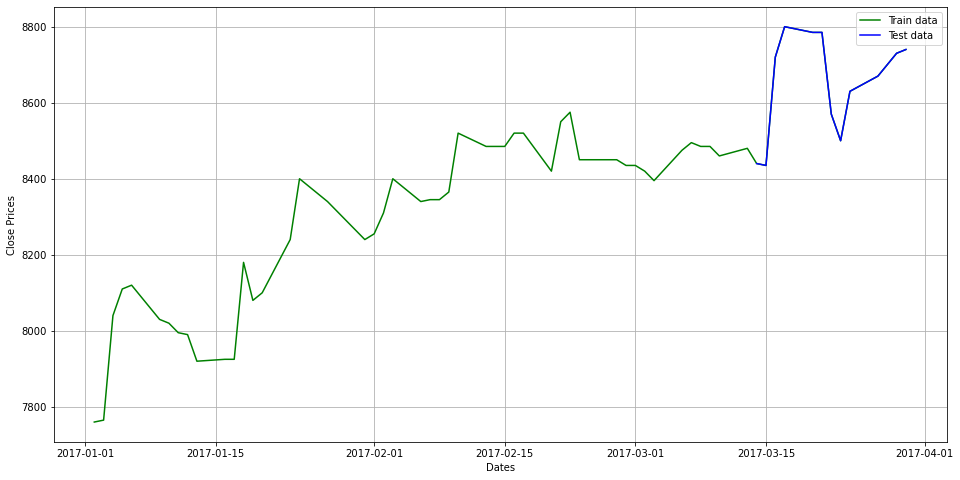

In [9]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel(column_dataset_obs+' Prices')
plt.plot(data[column_dataset_obs], 'green', label='Train data')
plt.plot(test_data[column_dataset_obs], 'blue', label='Test data')
plt.legend()

In [10]:
print("Jumlah Train Data: " + str(len(train_data)))
print("Jumlah Test Data: " + str(len(test_data)))

Jumlah Train Data: 50
Jumlah Test Data: 12


## ARIMA Model

In [11]:
predictions, y = ARIMA_model.forecast_model(train_data, test_data, p,q)

### Plotting Prediction of ARIMA

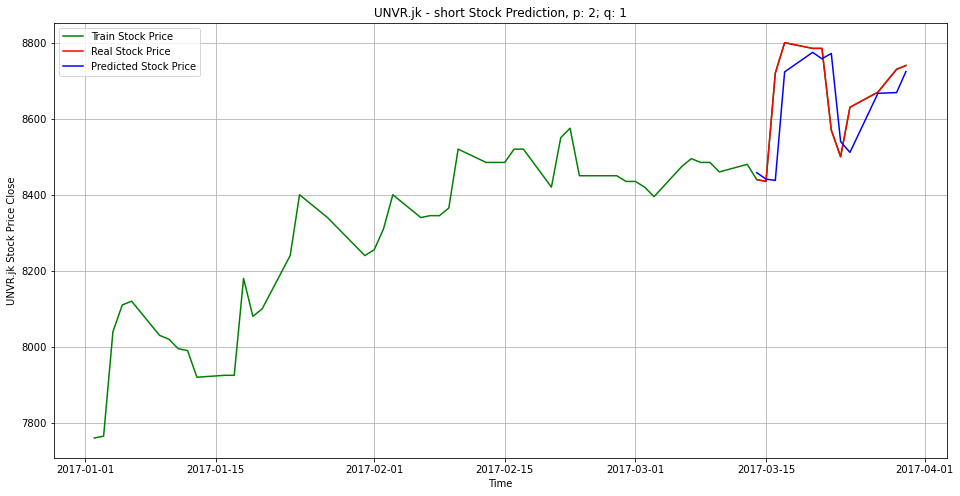

In [12]:
plt.figure(figsize=(16,8))
plt.plot(data.index[:], data[column_dataset_obs], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title(symbol_dataset+ ' - ' + term_status +  ' Stock Prediction, p: '+ str(p) +'; q: '+str(q))
plt.xlabel('Time')
plt.ylabel(symbol_dataset +' Stock Price '+ column_dataset_obs)
plt.legend()
plt.grid(True)
plt.savefig("../results/ARIMA/plots/" + symbol_dataset +'_ARIMA-'+ 
                            term_status + '_p='+ str(p) +'_q='+ str(q) + '.pdf')
plt.show()

In [13]:
# predictions,

## Visualize Test Data The Prediction and Real

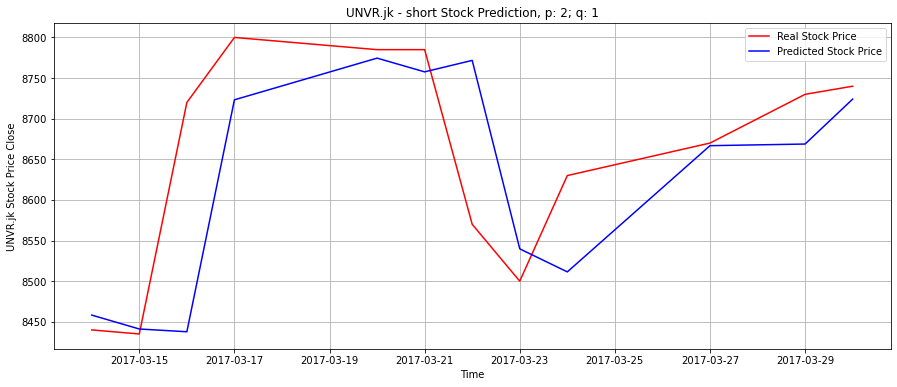

In [14]:
plt.figure()
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title(symbol_dataset+ ' - ' + term_status +' Stock Prediction, p: '+ str(p) +'; q: '+str(q))
plt.xlabel('Time')
plt.ylabel(symbol_dataset +' Stock Price '+ column_dataset_obs)
plt.legend()
plt.grid(True)
plt.show()

### Report Performance of ARIMA Predictions

In [15]:
# mse = mean_squared_error(y, predictions)
# print('MSE: '+str(mse))
print(symbol_dataset+"-"+term_status)
print('P: ' + str(p))
print('D: ' + str(d))
print('Q: ' + str(q))

rmse = EvaluasiForecasting.rmse_metric(y, predictions)
rmse = np.round(rmse, 2)
print(f'Root Mean Square Error (RMSE): {rmse}')

mae = EvaluasiForecasting.mae_metric(y, predictions)
mae = np.round(mae, 2)
print(f'Median Absolute Error (MAE): {mae}')

mape = EvaluasiForecasting.mape_metric(y, predictions)
mape = mape*100
mape = np.round(mape, 2)
print(f'Mean Absolute Percentage Error (MAPE): {mape} %')

UNVR.jk-short
P: 2
D: 1
Q: 1
Root Mean Square Error (RMSE): 110.74
Median Absolute Error (MAE): 71.8
Mean Absolute Percentage Error (MAPE): 82.87 %


## Save as new Dataset

In [16]:
price_prediction=predictions
new_date = pd.to_datetime(test_data.index)

In [17]:
new_data = {'Date': new_date,
            'real_close': y,
           'close_arima': price_prediction}

In [18]:
df_new_data = pd.DataFrame(new_data, columns = ['Date', 'real_close','close_arima'])

In [19]:
df_new_data.to_csv("../results/ARIMA/datasets/" + term_status + "/"+ symbol_dataset
                +'_ARIMA-'+ term_status + '_p='+ str(p) +'_q='+ str(q) + '.csv', index=False)

In [20]:
# df_new_data